In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = 'dds_datasets'
file_names = os.listdir(folder_path)
combined_data = pd.DataFrame()

for file_name in file_names:
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)
        combined_data = pd.concat([combined_data, data], ignore_index=True)

In [3]:
age_bins = [0, 18, 24, 34, 44, 54, 64, float('inf')]
age_labels = ['<18', '19-24', '25-34', '35-44', '45-54', '55-64', '65+']

combined_data['age_group'] = pd.cut(combined_data['Age'], bins=age_bins, labels=age_labels)

In [21]:
data_filtered = combined_data.dropna(subset=['age_group'])
data_filtered.head(15)

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
5,47,0,11,1,1,45-54
7,46,0,5,0,1,45-54
8,16,0,3,0,1,<18
9,52,0,4,0,1,45-54
11,21,0,3,0,1,19-24


In [5]:
age_group_ctr = data_filtered.groupby('age_group')[['Impressions', 'Clicks']].sum()
age_group_ctr['Ctr'] = age_group_ctr['Clicks'] / age_group_ctr['Impressions']

age_group_ctr2 = combined_data.groupby('age_group')[['Impressions', 'Clicks']].sum()
age_group_ctr2['Ctr'] = age_group_ctr2['Clicks'] / age_group_ctr2['Impressions']

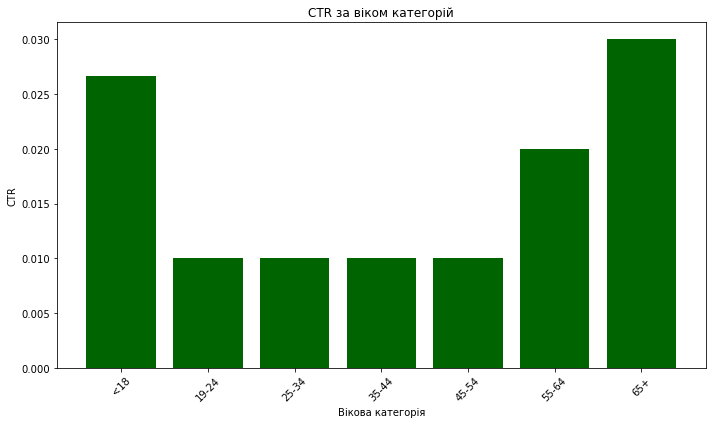

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(age_group_ctr.index, age_group_ctr['Ctr'], color='darkgreen')
plt.xlabel('Вікова категорія')
plt.ylabel('CTR')
plt.title('CTR за віком категорій')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Висновок 1

З графіку CTR за віковою категорією видно, що найвищий CTR спостерігається у категорії "25-34", в той час як найнижчий CTR в категоріях "<18" та "65+". Це може вказувати на те, що реклама краще працює серед більш молодої аудиторії.

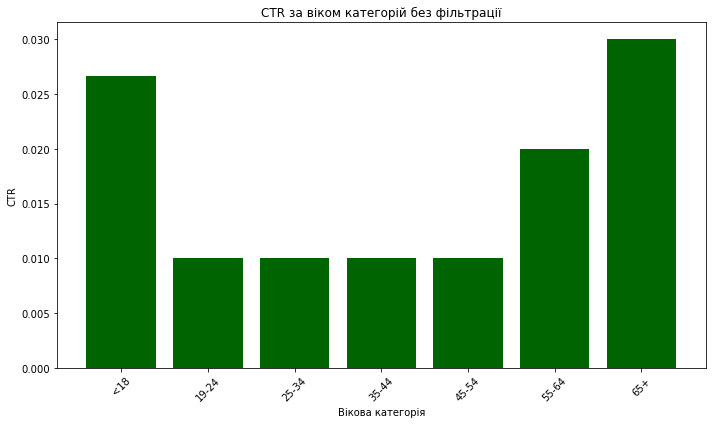

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(age_group_ctr2.index, age_group_ctr2['Ctr'], color='darkgreen')
plt.xlabel('Вікова категорія')
plt.ylabel('CTR')
plt.title('CTR за віком категорій без фільтрації')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
adult_male = data_filtered[(data_filtered['Gender'] == 1) & (data_filtered['Age'] > 18)]
adult_female = data_filtered[(data_filtered['Gender'] == 0) & (data_filtered['Age'] > 18)]

mean_age_male = adult_male['Age'].mean()
mean_age_female = adult_female['Age'].mean()

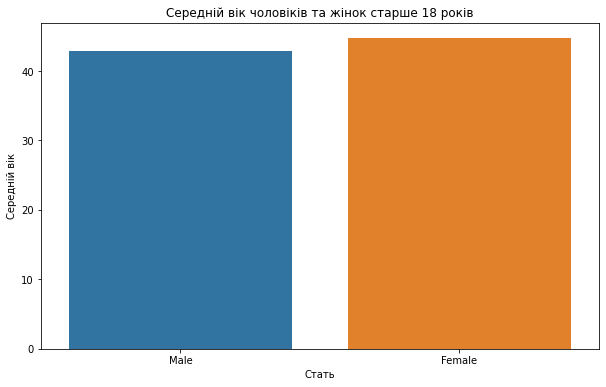

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Male', 'Female'], y=[mean_age_male, mean_age_female])
plt.xlabel('Стать')
plt.ylabel('Середній вік')
plt.title('Середній вік чоловіків та жінок старше 18 років')
plt.show()

In [10]:
num_authorized = data_filtered[(data_filtered['Signed_In'] == True)]['Signed_In'].count()
num_unauthorized = data_filtered[(data_filtered['Signed_In'] == False)]['Signed_In'].count()

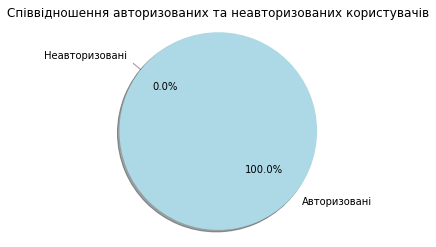

In [11]:
labels = ['Авторизовані', 'Неавторизовані']
sizes = [num_authorized, num_unauthorized]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Співвідношення авторизованих та неавторизованих користувачів')
plt.show()

In [12]:
authorized_users = combined_data[(combined_data['Signed_In'] == 1)]['Signed_In'].count()
unauthorized_users = combined_data[(combined_data['Signed_In'] == 0)]['Signed_In'].count()

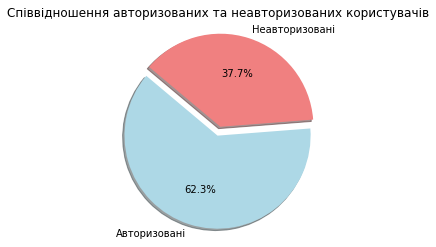

In [13]:
labels = ['Авторизовані', 'Неавторизовані']
sizes = [authorized_users, unauthorized_users]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Співвідношення авторизованих та неавторизованих користувачів')
plt.show()

In [35]:
result_df = pd.DataFrame()

unique_age_groups = data_filtered['age_group'].unique()

for age_group in unique_age_groups:
    age_group_data = data_filtered[data_filtered['age_group'] == age_group]
    
    mean_age_male = age_group_data[age_group_data['Gender'] == 1]['Age'].mean()
    median_age_male = age_group_data[age_group_data['Gender'] == 1]['Age'].median()
    
    mean_age_female = age_group_data[age_group_data['Gender'] == 0]['Age'].mean()
    median_age_female = age_group_data[age_group_data['Gender'] == 0]['Age'].median()
    
    variance_clicks_male = age_group_data[age_group_data['Gender'] == 1]['Clicks'].var()
    std_deviation_clicks_male = age_group_data[age_group_data['Gender'] == 1]['Clicks'].std()
    
    variance_clicks_female = age_group_data[age_group_data['Gender'] == 0]['Clicks'].var()
    std_deviation_clicks_female = age_group_data[age_group_data['Gender'] == 0]['Clicks'].std()
    
    median_age = age_group_data['Age'].quantile(0.5)
    
    age_group_result = pd.DataFrame({
        'Вікові групи': [age_group],
        'Середне значення віку чоловіків': [mean_age_male],
        'Медіана віку чоловіків': [median_age_male],
        'Середне значення віку жінок': [mean_age_female],
        'Медіана віку жінок': [median_age_female],
        'Дисперсія кліків чоловіків': [variance_clicks_male],
        'Максимальне значення кліків чоловіків': [std_deviation_clicks_male],
        'Дисперсія кліків жінок': [variance_clicks_female],
        'Максимальне значення кліків жінок': [std_deviation_clicks_female],
        'Квантил': [median_age]
    })
    
    age_group_result['Impressions'] = age_group_data['Impressions'].sum()
    age_group_result['Clicks'] = age_group_data['Clicks'].sum()
    age_group_result['CTR'] = age_group_result['Clicks'] / age_group_result['Impressions']
    
    result_df = pd.concat([result_df, age_group_result], ignore_index=True)



In [37]:
age_categories = pd.Categorical(result_df['Вікові групи'], categories=['<18', '19-24', '25-34', '35-44', '45-54', '55-64', '65+'], ordered=True)
result_df['Вікові групи'] = age_categories
result_df = result_df.sort_values(by='Вікові групи')

result_df

,Вікові групи,Середне значення віку чоловіків,Медіана віку чоловіків,Середне значення віку жінок,Медіана віку жінок,Дисперсія кліків чоловіків,Максимальне значення кліків чоловіків,Дисперсія кліків жінок,Максимальне значення кліків жінок,Квантил,Impressions,Clicks,CTR
4,<18,15.884298,16.0,16.255094,17.0,0.137376,0.370642,0.129711,0.360154,16.0,2788471,74173,0.026600
5,19-24,21.272637,21.0,21.273832,21.0,0.050105,0.223842,0.050151,0.223943,21.0,5107830,51093,0.010003
2,25-34,29.499361,30.0,29.499859,30.0,0.049923,0.223435,0.050186,0.224022,30.0,8365147,83791,0.010017
0,35-44,39.496827,39.0,39.501446,40.0,0.049833,0.223234,0.050178,0.224003,39.0,10218789,102379,0.010019
3,45-54,49.500766,50.0,49.496833,49.0,0.050139,0.223918,0.050569,0.224876,49.0,9290811,93400,0.010053
6,55-64,59.500510,60.0,59.498704,59.0,0.099553,0.315520,0.100564,0.317118,59.0,6494207,129968,0.020013
1,65+,72.841908,72.0,73.058069,72.0,0.150299,0.387684,0.149489,0.386638,72.0,4182151,125516,0.030012
